In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Attivo Trainning\Technical Videos\AI_ML\Jupyter Notebook Daily Practice\Day13_15_07_2025\Weather Time Series Analysis\Time-Series Analysis Dataset.csv')

In [3]:
df.head()

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,25.0,1.0,22.06,105.0,2.94,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night


In [4]:
df['datetime_local'] = pd.to_datetime(df['datetime_local'], dayfirst=True, errors='raise')

In [5]:
df['datetime_local'] = pd.to_datetime(df['datetime_local'])
df.set_index('datetime_local', inplace = True)

In [6]:
df.head()

,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
datetime_local,,,,,,,,,,,
2019-10-01 00:00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
2019-10-01 01:00:00,25.0,1.0,22.06,105.0,2.94,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2019-10-01 02:00:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
2019-10-01 03:00:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
2019-10-01 04:00:00,23.0,1.0,21.53,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night


In [7]:
import matplotlib.pyplot as plt

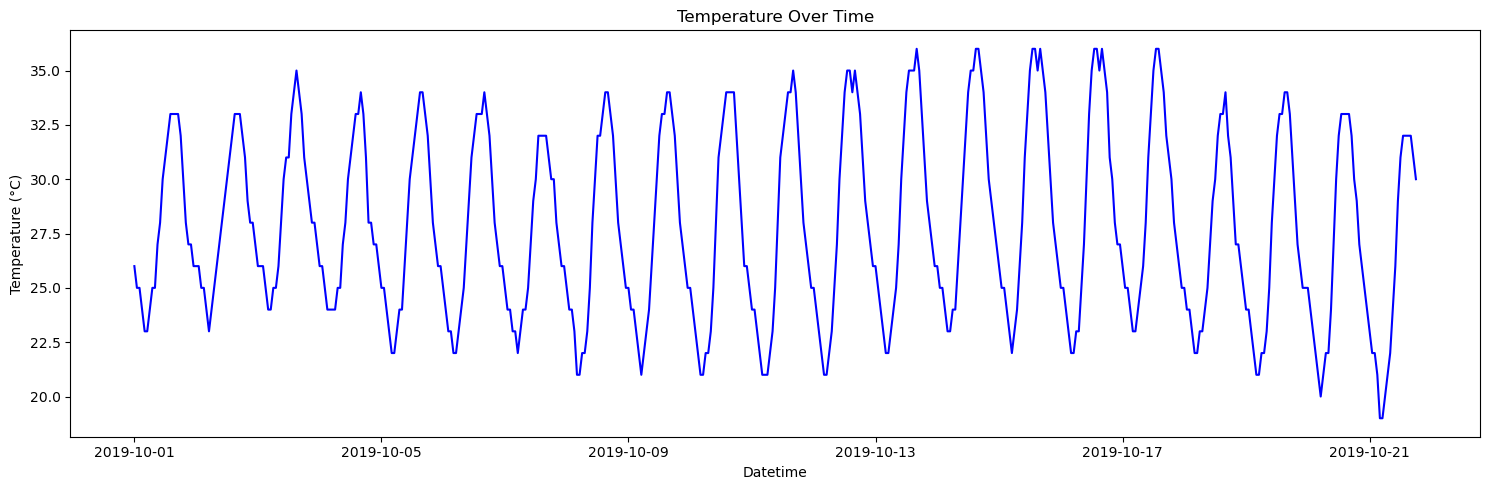

In [8]:
#Basic Time-Series Line Chart
plt.figure(figsize = (15,5))
#plt.plot(df, color = 'blue')
plt.plot(df.index, df['temperature'], color='blue')
plt.title("Temperature Over Time")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

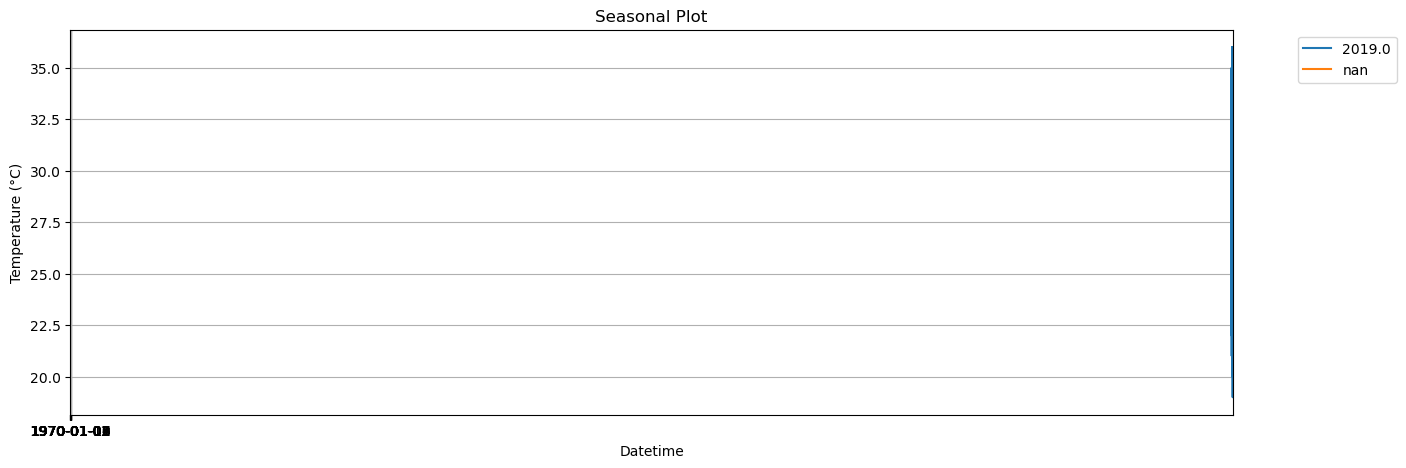

In [9]:
#Seasonal Plot
plt.figure(figsize = (15,5))
years = df.index.year.unique()
for year in years:
    df_year = df[df.index.year == year]
    plt.plot(df_year.index, df_year['temperature'], label=str(year))
plt.title("Seasonal Plot")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left')
plt.xticks(range(1,13))
plt.show()

In [10]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
duplicates = df.index.duplicated()
print(f"Number of duplicate datetime entries: {duplicates.sum()}")

Number of duplicate datetime entries: 148


In [12]:
df = df[~df.index.duplicated()]

In [13]:
df = df.asfreq('h')
df['temperature'] = df['temperature'].interpolate()
decomposition = seasonal_decompose(df['temperature'], model='multiplicative', period=24)

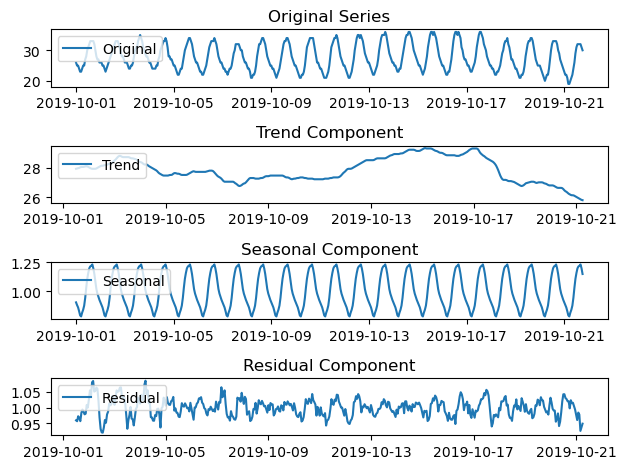

In [14]:
plt.subplot(4,1,1)
plt.plot(df['temperature'], label='Original')
plt.legend(loc = 'upper left')
plt.title('Original Series')

plt.subplot(4,1,2)
plt.plot(decomposition.trend, label = 'Trend')
plt.legend(loc = 'upper left')
plt.title('Trend Component')

plt.subplot(4,1,3)
plt.plot(decomposition.seasonal, label = 'Seasonal')
plt.legend(loc = 'upper left')
plt.title('Seasonal Component')

plt.subplot(4,1,4)
plt.plot(decomposition.resid, label = 'Residual')
plt.legend(loc = 'upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [15]:
import seaborn as sns

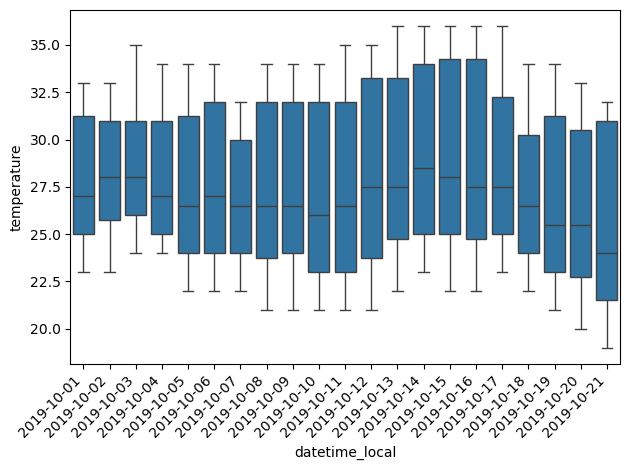

In [16]:
sns.boxplot(x = df.index.strftime('%Y-%m-%d'), y = df['temperature'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()